In [1]:
# Importación de bibliotecas necesarias para el análisis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Cargar el dataset
df = pd.read_csv('C:/Users/34652/Desktop/machine-learning-main/practica_final/cybersecurity_attacks.csv')  # Ajusta la ruta según corresponda.
# Visualización inicial de los tipos de datos y algunas filas.
print(df.dtypes)
display(df.head())


Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [4]:
# Rellenar valores nulos
df.fillna(method='ffill', inplace=True)


In [5]:
# Codificación de variables categóricas
label_encoders = {}
df_encoded = df.copy()
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le


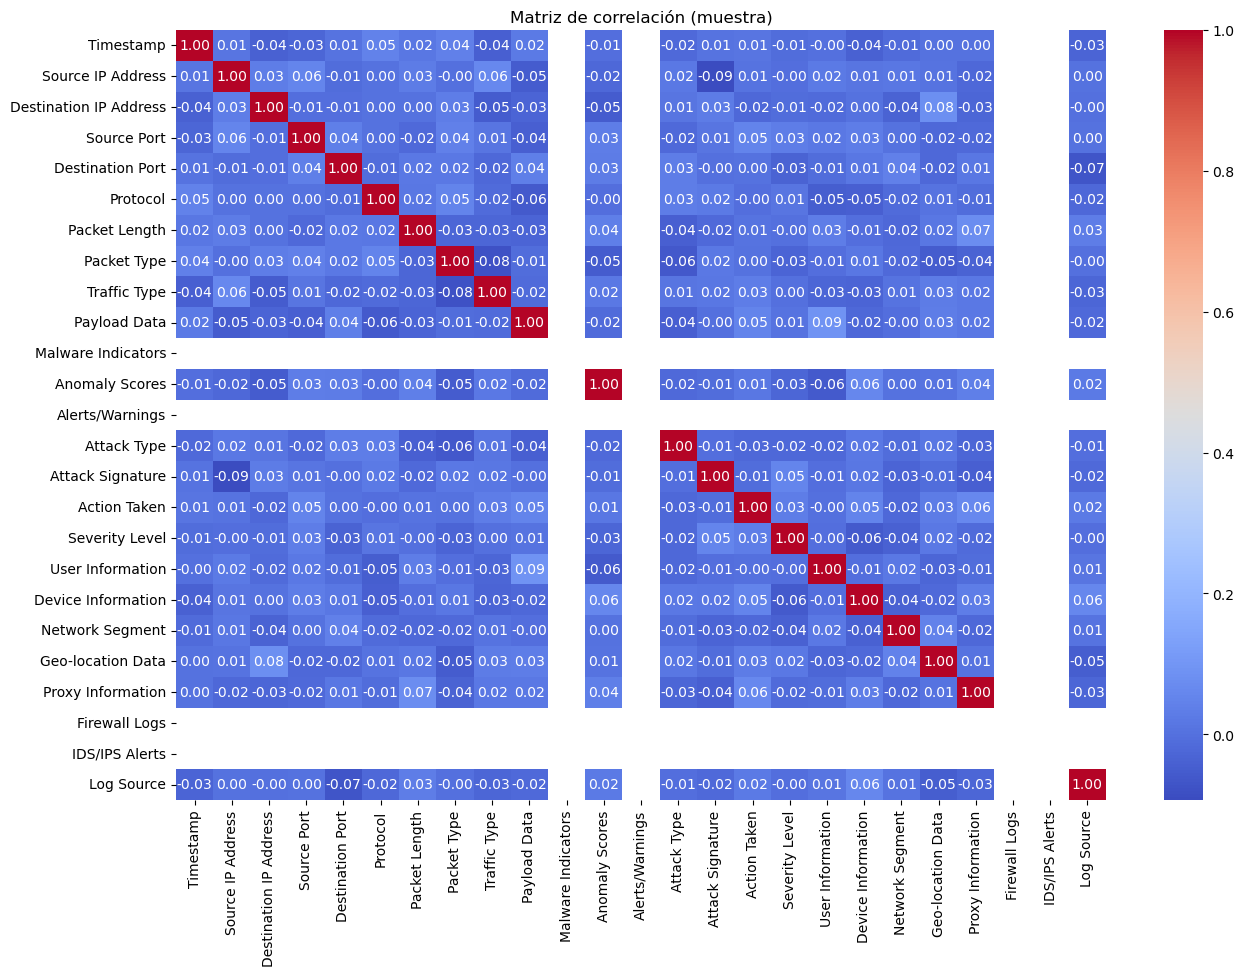

In [6]:
# Matriz de correlación
df_sample = df_encoded.sample(n=1000, random_state=42)
plt.figure(figsize=(15, 10))
sns.heatmap(df_sample.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación (muestra)")
plt.show()


In [7]:
# Variables objetivo
targets = ['Action Taken', 'Severity Level', 'Attack Type']


In [8]:
for target in targets:
    print(f"\nEntrenando modelo para predecir: {target}\n")
    
    # División de datos
    X = df_encoded.drop([target], axis=1)
    y = df_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest con GridSearchCV
    param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
    rf = RandomForestClassifier(random_state=42)
    grid_search_rf = GridSearchCV(rf, param_grid, cv=3, verbose=1, n_jobs=-1)
    
    try:
        grid_search_rf.fit(X_train, y_train)
        best_rf = grid_search_rf.best_estimator_
        y_pred_rf = best_rf.predict(X_test)
        print(f"Precisión (accuracy) para {target}: {best_rf.score(X_test, y_test)}")
        print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))
        print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
    except MemoryError as e:
        print(f"Error de memoria: {e}")
    
    # Logistic Regression
    logreg = LogisticRegression(max_iter=1000)
    try:
        logreg.fit(X_train, y_train)
        y_pred_logreg = logreg.predict(X_test)
        print(f"Precisión (accuracy) para {target} con Logistic Regression: {logreg.score(X_test, y_test)}")
        print("Reporte de clasificación:\n", classification_report(y_test, y_pred_logreg))
        print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_logreg))
    except MemoryError as e:
        print(f"Error de memoria en Logistic Regression: {e}")



Entrenando modelo para predecir: Action Taken

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Precisión (accuracy) para Action Taken: 0.33725
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.35      0.53      0.42      2733
           1       0.33      0.30      0.31      2622
           2       0.32      0.18      0.23      2645

    accuracy                           0.34      8000
   macro avg       0.33      0.34      0.32      8000
weighted avg       0.33      0.34      0.32      8000

Matriz de confusión:
 [[1440  785  508]
 [1351  791  480]
 [1353  825  467]]
Precisión (accuracy) para Action Taken con Logistic Regression: 0.336875
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.35      0.58      0.43      2733
           1       0.32      0.37      0.34      2622
           2       0.36      0.06      0.10      2645

    accuracy                           0.

In [ ]:
# **Explicación de las métricas**:
# - Precisión (accuracy): Es el porcentaje de predicciones correctas en relación con el total de predicciones.
#   - Un valor cercano a 1 indica que el modelo está clasificando correctamente la mayoría de los ejemplos.
# - Precisión, Recall y F1-score:
#   - **Precisión**: De todas las predicciones positivas que hizo el modelo, ¿cuántas fueron realmente positivas?
#   - **Recall**: De todos los ejemplos realmente positivos, ¿cuántos predijo correctamente el modelo?
#   - **F1-score**: Es la media armónica de precisión y recall, usada cuando necesitas un balance entre ambos.
# - Matriz de confusión:
#   - Permite visualizar cuántos ejemplos de cada clase fueron correctamente clasificados y cuántos fueron mal clasificados.
#   - La diagonal de la matriz muestra los aciertos, mientras que las posiciones fuera de la diagonal son los errores de clasificación.

# Conclusión :
# En esta práctica de Machine Learning aplicada a ciberseguridad, se han entrenado y evaluado modelos para predecir 
# Action Taken, Severity Level y Attack Type. Sin embargo, los resultados no muestran una alta precisión ni f1-score, 
# lo que puede deberse a varios factores.

# Causas del bajo rendimiento:
# 1. Calidad de los datos: Las relaciones complejas entre las características pueden no haber sido capturadas correctamente, 
# o algunas variables pueden no aportar información relevante.
# 2. Desequilibrio de clases: Algunas clases dominan en las predicciones, lo que afecta el desempeño.
# 3. Modelos utilizados: Aunque RandomForest y Logistic Regression son sólidos, otros modelos o ajustes de hiperparámetros 
# podrían mejorar el rendimiento.
# 4. Selección de características: No todas las columnas utilizadas son útiles. Un proceso de selección más exhaustivo 
# podría ayudar.

# Reflexión: 
# Más importante que obtener métricas perfectas es entender por qué los modelos funcionan de cierta manera. Se deben explorar más 
# los datos, ajustar modelos y aplicar técnicas avanzadas para mejorar el rendimiento en futuros análisis.